In [12]:
import numpy as np
import tensorflow as tf

# 입력이미지의 형태
# (이미지의 개수, height, width, channel) => 4차원 데이터
# (1, 3, 3, 1)
# 위와 같은 shape을 가지는 ndarray를 만들어 보아요!
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)

# filter(kernel)의 형태
# (filter height, filter width, filter channel, filter의 개수)
# (2, 2, 1, 1)
weight = np.array([[[[1]],[[1]]],
                   [[[1]],[[1]]]],dtype=np.float32)
print(weight.shape)

# stride : 1 (가로 1, 세로 1)
# padding처리 : VALID (padding처리 안해요!)

conv2d = tf.nn.conv2d(image,
                      weight,
                      strides=[1,1,1,1],
                      padding='VALID')
sess = tf.Session()
result = sess.run(conv2d)
print('feature map : \n{}'.format(result))
# convolution의 결과
# (이미지의 개수, height, width, channel)
# channel은 filter의 개수와 같아요!
# (1, 2, 2, 1)
print(result.shape)

(1, 3, 3, 1)
(2, 2, 1, 1)
feature map : 
[[[[12.]
   [16.]]

  [[24.]
   [28.]]]]
(1, 2, 2, 1)


In [13]:
import numpy as np
import tensorflow as tf

# 입력이미지의 형태
# (이미지의 개수, height, width, channel) => 4차원 데이터
# (1, 3, 3, 3)
# 위와 같은 shape을 가지는 ndarray를 만들어 보아요!
image = np.array([[[[1,2,3],[1,2,3],[1,2,3]],
                   [[1,2,3],[1,2,3],[1,2,3]],
                   [[1,2,3],[1,2,3],[1,2,3]]]], dtype=np.float32)
print(image.shape)

# filter(kernel)의 형태
# (filter height, filter width, filter channel, filter의 개수)
# (2, 2, 3, 2)
weight = np.array([[[[1,1],[1,1],[1,1]],
                   [[1,1],[1,1],[1,1]]],
                   [[[1,1],[1,1],[1,1]],
                    [[1,1],[1,1],[1,1]]]],dtype=np.float32)
print(weight.shape)

# stride : 1 (가로 1, 세로 1)
# padding처리 : VALID (padding처리 안해요!)

conv2d = tf.nn.conv2d(image,
                      weight,
                      strides=[1,1,1,1],
                      padding='VALID')
sess = tf.Session()
result = sess.run(conv2d)
print('feature map : \n{}'.format(result))
# convolution의 결과
# (이미지의 개수, height, width, channel)
# channel은 filter의 개수와 같아요!
# (1, 2, 2, 2)
print(result.shape)

(1, 3, 3, 3)
(2, 2, 3, 2)
feature map : 
[[[[24. 24.]
   [24. 24.]]

  [[24. 24.]
   [24. 24.]]]]
(1, 2, 2, 2)


<class 'numpy.ndarray'>
(429, 640, 3)
(1, 429, 640, 3)
[17. 17. 17.]
(1, 429, 640, 1)
적용할 filter의 shape : (3, 3, 1, 1)
convolution 결과 shape : (1, 427, 638, 1)


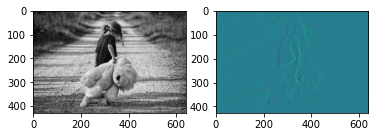

In [24]:
# 실제 이미지로 test
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

figure = plt.figure()
fig_1 = figure.add_subplot(1,2,1)
fig_2 = figure.add_subplot(1,2,2)

ori_image = img.imread('./image/girl-teddy.jpg')
fig_1.imshow(ori_image)


print(type(ori_image))  # <class 'numpy.ndarray'>
print(ori_image.shape)  # (429, 640, 3)
# (429, 640, 3) => (1, 429, 640, 3)
input_image = ori_image.reshape((1,) + ori_image.shape)
print(input_image.shape)  # (1, 429, 640, 3)
input_image = input_image.astype(np.float32) # 실수데이터로 전환

print(input_image[0,0,0,:])
channel_1_input_image = input_image[:,:,:,0:1]
print(channel_1_input_image.shape)  # (1, 429, 640, 1)

# filter
# (3,3,1,1)
weight = np.array([[[[-1]], [[0]], [[1]]],
                   [[[-1]], [[0]], [[1]]],
                   [[[-1]], [[0]], [[1]]]])
print('적용할 filter의 shape : {}'.format(weight.shape)) # (3, 3, 1, 1)

# stride : 1
# padding : VALID

conv2d = tf.nn.conv2d(channel_1_input_image,
                      weight,
                      strides=[1,1,1,1],
                      padding='VALID')
sess = tf.Session()
result = sess.run(conv2d)
print('convolution 결과 shape : {}'.format(result.shape))
# (1, 427, 638, 1)
result_image = result[0,:,:,:]
fig_2.imshow(result_image)
plt.show()